<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are working on developing an email spam detection system for an email service provider.
Goal is to build a machine learning model that can classify incoming emails as either spam
or not spam based on their content. You have collected a labeled dataset of emails, where each
email is marked as &#39;Spam&#39; or &#39;Not Spam.&#39; Implement a Naive Bayes-based
classification model with Laplace smoothing for this task.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_curve
import re
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB

In [2]:
spam_data = pd.read_csv('/content/spam_or_not_spam.csv')
spam_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
spam_data.isnull()

,email,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [21]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


Bar chart or pie chart that illustrates the distribution of the
email dataset, showing the proportion of emails that are labeled as &#39;Spam&#39; and &#39;Not Spam.&#39; This
will give an overview of the class balance in the dataset.

Text(0.5, 1.0, 'Distribution of Emails (Spam vs. Not Spam)')

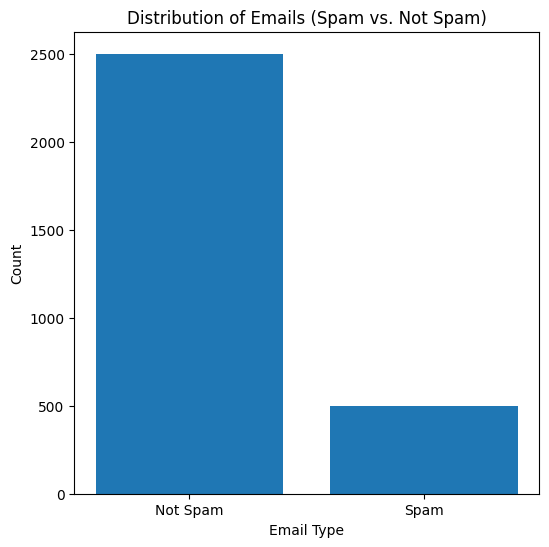

In [5]:
# Counting the number of emails in each class

spam_count = spam_data['label'].sum()
not_spam_count = len(spam_data) - spam_count

plt.figure(figsize=(6, 6))
plt.bar(['Not Spam', 'Spam'], [not_spam_count, spam_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Emails (Spam vs. Not Spam)')


**Findings:** Bar chart clearly shows the class imbalance in the dataset, where "not spam" class has a higher count than the "spam" class.

Checking the missing values

In [8]:
missing_values = spam_data['email'].isnull().sum()
print(f"Number of missing values: {missing_values}")

Number of missing values: 0


In [7]:
spam_data.dropna(subset=['email'],inplace=True) # Removing rows with missing email text
spam_data['email'].fillna('',inplace=True)

Splitting the dataset into training and testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(spam_data['email'], spam_data['label'], test_size=0.2, random_state=42)

In [10]:
def clean_text(text):

    # Removing non-alphabetical characters and numbers

    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    return text


In [11]:
# Apply the clean_text function to your email data

X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)

In [13]:
# Creating a TF-IDF vectorizer

vectorizer = TfidfVectorizer()

# Fit and transform the training data

X_train_vectorized = vectorizer.fit_transform(X_train_cleaned)

# Transform the testing data using the same vectorizer

X_test_vectorized = vectorizer.transform(X_test_cleaned)


Performed oversampling to avoid the class imbalance in the dataset, with the help of SMOTE. Smote is a statistical technique for increasing the number of cases in your dataset in a balanced way

In [14]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

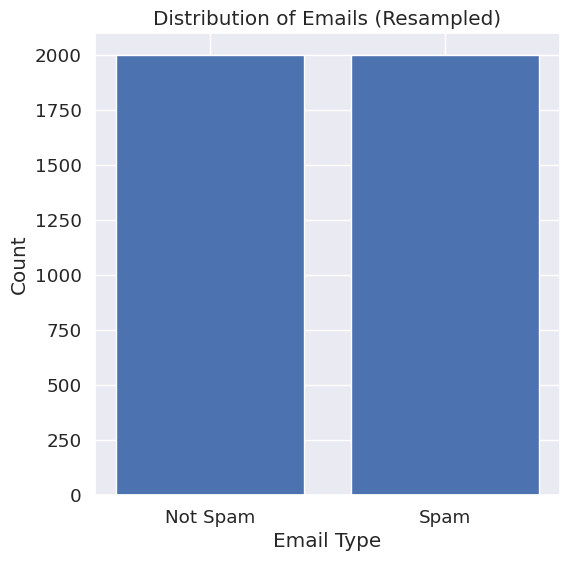

In [20]:
spam_count_resampled = sum(y_train_resampled)
not_spam_count_resampled = len(y_train_resampled) - spam_count_resampled

# Create a bar chart to explore the distribution
plt.figure(figsize=(6, 6))
plt.bar(['Not Spam', 'Spam'], [not_spam_count_resampled, spam_count_resampled])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Emails (Resampled)')
plt.show()

**Findings:** This Bar chart clearly shows the class is balanced now.
Then we can proceed with naive bayes algorithm.

In [15]:
# Create a Multinomial Naive Bayes classifier with Laplace smoothing
nb_classifier = MultinomialNB(alpha=1.0)  # 'alpha' controls the smoothing, typically set to 1.0 (Laplace smoothing)

# Train the classifier on the vectorized training data
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [16]:
y_pred = nb_classifier.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       500
           1       1.00      0.22      0.36       100

    accuracy                           0.87       600
   macro avg       0.93      0.61      0.64       600
weighted avg       0.89      0.87      0.83       600



Confusion matrix to visualize the model's
performance. Using ConfusionMatrixDisplay to display the true positive, true negative,
false positive, and false negative predictions.

<Figure size 800x600 with 0 Axes>

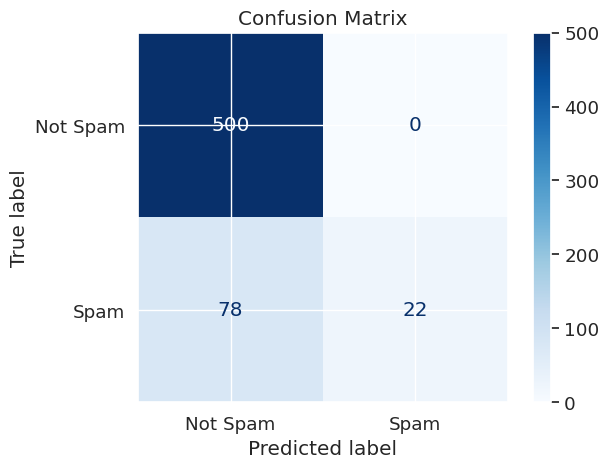

In [17]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

# Creating a ConfusionMatrixDisplay object for better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Spam", "Spam"])

disp.plot(cmap="Blues", values_format=".4g")  # You can customize the color map and format

plt.title('Confusion Matrix')
plt.show()

**Findings:**

True Positives (TP): 500

This represents the number of non-spam emails that were correctly classified as non-spam by your model. These are the emails that your model correctly identified as not spam.

True Negatives (TN): 22

This represents the number of spam emails that were correctly classified as spam by your model. These are the emails that your model correctly identified as spam.

False Positives (FP): 79

This represents the number of non-spam emails that were incorrectly classified as spam by your model. These are the emails that your model mistakenly identified as spam when they were not.

False Negatives (FN): 0

Here the Model did not mistakenly classify any actual spam emails as non-spam. This is a desirable outcome for a spam detection system.




Plot an ROC curve to visualize the trade off between the model's true positive rate (sensitivity) and false positive rate (1-specificity) at
different classification thresholds.

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

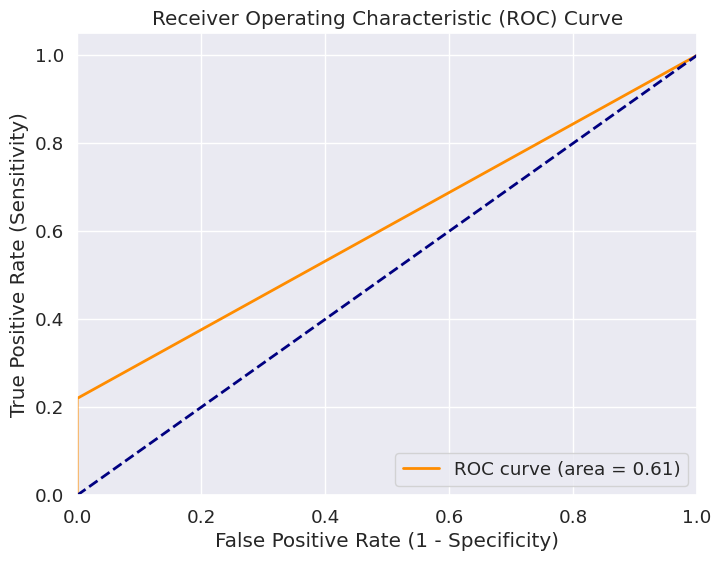

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Interpretation:** To choose an appropriate threshold for spam detection.
If the priority is minimizing false positives (non-spam emails incorrectly classified as spam), you may choose a threshold that leans toward high specificity (lower FPR).
If the priority is maximize sensitivity (detecting as much spam as possible), you may choose a threshold that leans toward high TPR, even if it means accepting some false positives.

The choice of threshold depends on the trade-off that aligns with the spam detection goals and tolerance for false positives.

Precision-recall curve to assess the model's precision and
recall at various decision thresholds.

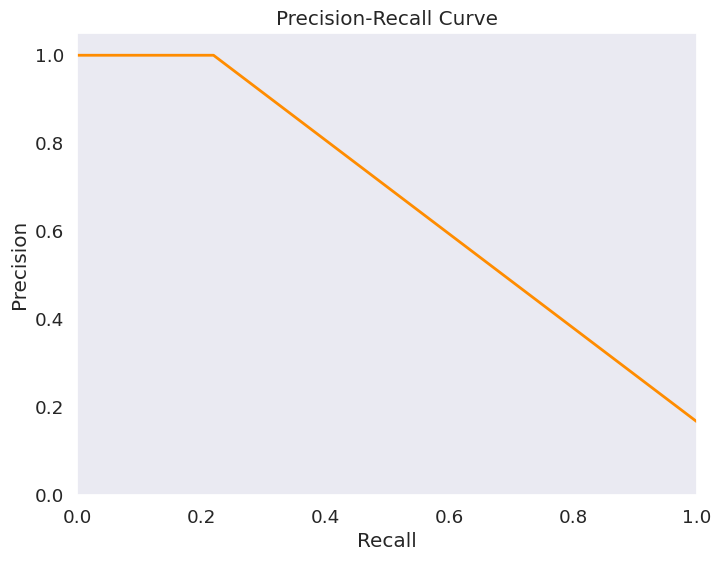

In [23]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

**Findings:** In email spam detection, precision is important because it tells how many of the emails classified as spam are true spam. A higher precision means fewer false positives, which is desirable as it reduces the risk of legitimate emails being marked as spam.

Recall is also crucial because it indicates how effectively the model detects actual spam. A high recall means that most of the spam emails are detected, minimizing the chances of letting spam through.

Laplace smoothing affects the model's probability estimates, which in turn can impact the classification thresholds. When using Laplace smoothing, we can find that precision and recall values are more stable and less sensitive to small changes in the threshold. This can be advantageous for fine-tuning the model and achieving a good balance between precision and recall.

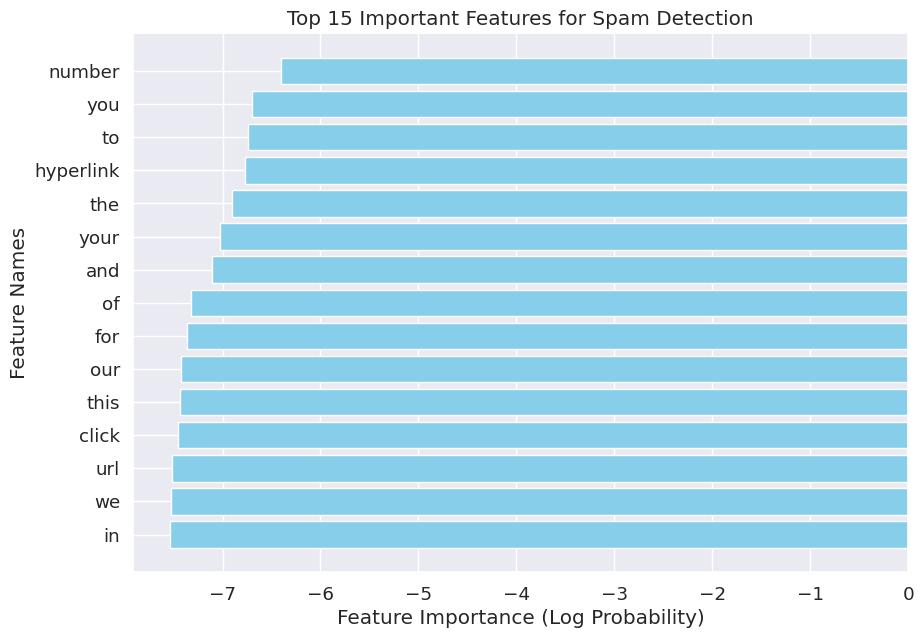

In [33]:
feature_importance_scores = nb_classifier.feature_log_prob_[1]  # 1 is the spam class

# Getting the feature names from the vectorizer used for training

feature_names = vectorizer.get_feature_names_out()

# Combining feature names and their importance scores

feature_importance = list(zip(feature_names, feature_importance_scores))

feature_importance.sort(key=lambda x: x[1], reverse=True)

# Selecting the top N important features

top_n = 15

top_n_features = feature_importance[:top_n]
top_n_features_names, top_n_features_scores = zip(*top_n_features)

plt.figure(figsize=(10, 7))
plt.barh(top_n_features_names, top_n_features_scores, color='skyblue')
plt.xlabel('Feature Importance (Log Probability)')
plt.ylabel('Feature Names')
plt.title(f'Top {top_n} Important Features for Spam Detection')
plt.gca().invert_yaxis()
plt.show()

**Findings:** These words or phrases are the strong indicators for spam detection

Model Evaluation Metrics

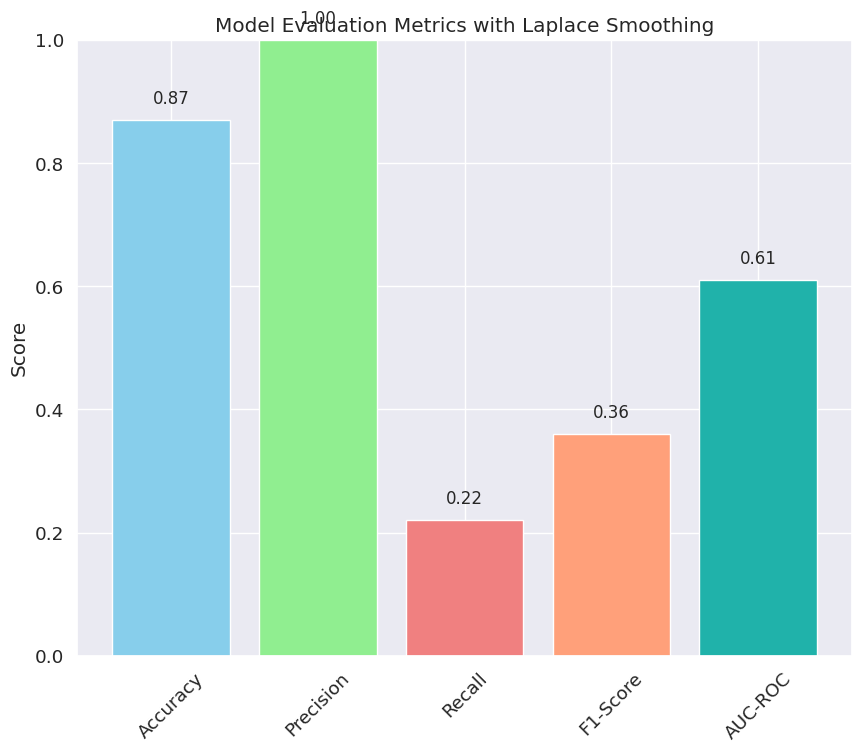

In [44]:
# Calculating evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
values = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 8))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics with Laplace Smoothing')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Loop is for adding numeric values on top of the bars

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

Line graph or a bar chart that
demonstrates the trade-offs between precision and recall at different decision thresholds,
considering the smoothing technique.

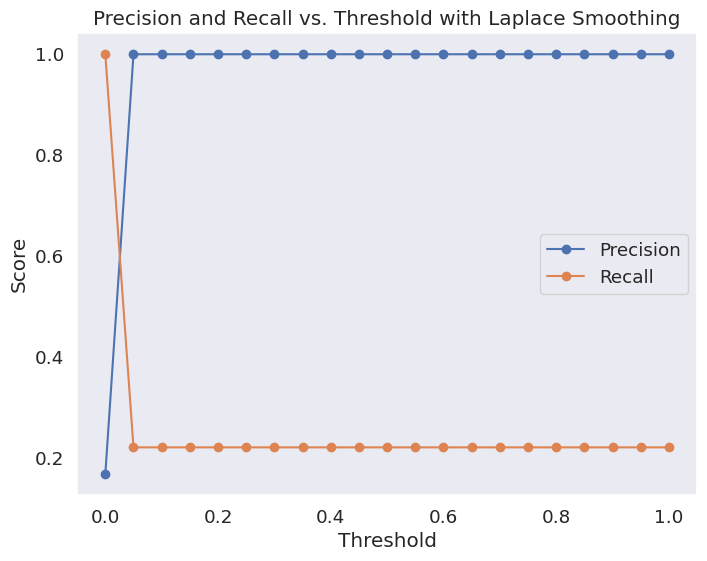

In [46]:
thresholds = np.arange(0, 1.05, 0.05)  # Range of thresholds to consider

# Initialize lists to store precision and recall values

precision_values = []
recall_values = []

# Calculate precision and recall at each threshold

for threshold in thresholds:

    y_pred_binary = (y_pred >= threshold).astype(int)

    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)

    # Appending

    precision_values.append(precision)
    recall_values.append(recall)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_values, label='Precision', marker='o', linestyle='-')
plt.plot(thresholds, recall_values, label='Recall', marker='o', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold with Laplace Smoothing')
plt.legend()
plt.grid()
plt.show()

**Observation:** This line graph provides a clear visualization of the precision recall tradeoffs at different decision thresholds.